In [1]:
# auto reload modules
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import cns
import cns.data_utils as cdu

plt.rcParams.update({'font.size': 12 })

In [3]:
samples_df, cns_df = cdu.main_load("imp")

In [4]:
dict_input = cns.cns_df_to_segments(cns_df)
dict_breaks = cns.segments_to_breaks(dict_input)
dict_segs = cns.breaks_to_segments(dict_breaks)

# Step 1: Convert the dictionary to a DataFrame
df = pd.DataFrame.from_dict(dict_breaks, orient='index').transpose()

# Step 2: Calculate the breakpoints per chromosome
breakpoints_per_chr = pd.DataFrame({
    'Chromosome': list(dict_breaks.keys()),
    'Breakpoints': [len(value) - 2 for value in dict_breaks.values()]
}).set_index('Chromosome')

# Step 3: Calculate the total breakpoints
total_breakpoints = breakpoints_per_chr['Breakpoints'].sum()

# Step 4: Display the DataFrame and the total breakpoints
print("Breakpoints per chromosome:")
print(breakpoints_per_chr)
print("\nTotal breakpoints:", total_breakpoints)

Breakpoints per chromosome:
            Breakpoints
Chromosome             
chr1              65373
chr10             34272
chr11             46632
chr12             48111
chr13             23512
chr14             24549
chr15             19508
chr16             24408
chr17             33672
chr18             22934
chr19             27110
chr2              54436
chr20             23596
chr21             12173
chr22             13208
chr3              54309
chr4              42061
chr5              45516
chr6              50925
chr7              44282
chr8              52679
chr9              33859
chrX              29312
chrY                188

Total breakpoints: 826625


In [5]:
chr_clusters = {}
orig_count = cns.values_count(dict_segs) - 24
print(f"Reducing {orig_count} segments:")
distances =  [1000 * (2**i) for i in range(11)]
counts = []
gen_segs = cns.genome_to_segments()
for dist in distances:
    time_start = time.time()
    res = cns.cluster_segments(dict_segs, dist)
    counts.append(cns.values_count(res) - 24)
    reduction = np.round(counts[-1] / orig_count * 100, 2)
    print(f"Dist: {dist}, count: {counts[-1]}, ratio: {reduction}%, time: {time.time() - time_start:.2f}s")

Reducing 826625 segments:
Dist: 1000, count: 625040, ratio: 75.61%, time: 16.30s
Dist: 2000, count: 506691, ratio: 61.3%, time: 12.55s
Dist: 4000, count: 368369, ratio: 44.56%, time: 9.65s
Dist: 8000, count: 240254, ratio: 29.06%, time: 7.00s
Dist: 16000, count: 143000, ratio: 17.3%, time: 4.91s
Dist: 32000, count: 79430, ratio: 9.61%, time: 3.52s
Dist: 64000, count: 42165, ratio: 5.1%, time: 2.68s
Dist: 128000, count: 21812, ratio: 2.64%, time: 2.24s
Dist: 256000, count: 11145, ratio: 1.35%, time: 2.07s
Dist: 512000, count: 5645, ratio: 0.68%, time: 1.91s
Dist: 1024000, count: 2864, ratio: 0.35%, time: 1.78s


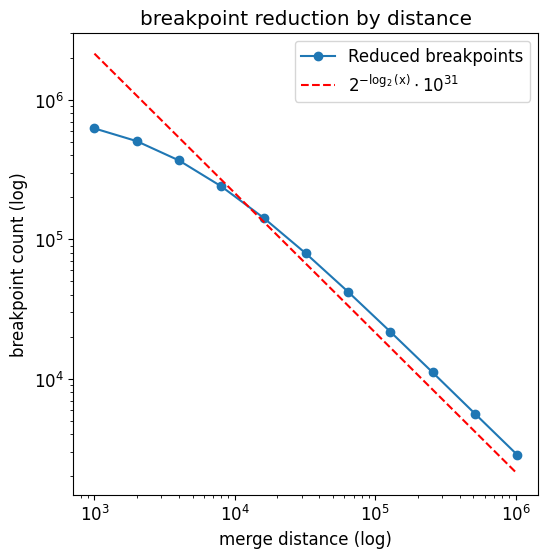

In [13]:
# set plot to 6x6
fig = plt.figure(figsize=(6, 6))
# Step 1: Perform linear regression on the log-transformed data
# Step 3: Plot the original data and the fit line
plt.plot(distances, counts, marker='o', label='Reduced breakpoints')
hand_fit = 2**(-np.log2(distances))*2**31
hand_label = r'$2^{-\log_2(\text{x})} \cdot 10^{31}$'
plt.plot(distances, hand_fit, linestyle='--', color='r', label=hand_label)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('merge distance (log)')
plt.ylabel('breakpoint count (log)')
plt.title('breakpoint reduction by distance')
plt.legend()
plt.show()
cdu.save_cns_fig("breakpoint_reduction", fig)